### Importing necessary packages

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.cm as cm
import scipy.stats as stats
import h5py

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'

AxesLabel, TickLabel = [10, 10]
plt.rcParams.update({
    'font.size' : TickLabel,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel,               # -> axis labels
    'legend.fontsize': AxesLabel,              # -> legends
    'xtick.labelsize': TickLabel,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel,              # -> y-axis tick labels
})

### Importing HDF5 files

In [2]:
## Upload all the necessary files in the same directory

with h5py.File("tavg_u.h5","r") as f:
    u = f["var"][()].T
    
with h5py.File("tavg_v.h5","r") as f:
    v = f["var"][()].T
    
with h5py.File("tavg_fu.h5","r") as f:
    fu = f["var"][()].T
    
with h5py.File("tavg_fv.h5","r") as f:
    fv = f["var"][()].T
    
with h5py.File("tavg_txxs11.h5","r") as f:
    txxs11 = f["var"][()].T
    
with h5py.File("tavg_txys12.h5","r") as f:
    txys12 = f["var"][()].T
    
with h5py.File("tavg_txzs13.h5","r") as f:
    txzs13 = f["var"][()].T
    
with h5py.File("tavg_tyys22.h5","r") as f:
    tyys22 = f["var"][()].T  
    
with h5py.File("tavg_tyzs23.h5","r") as f:
    tyzs23 = f["var"][()].T
    
with h5py.File("tavg_tzzs33.h5","r") as f:
    tzzs33 = f["var"][()].T
    
with h5py.File("tavg_production.h5","r") as f:
    prod = f["var"][()].T

### Calculating streamwise velocities at $z=0.1$km and $y=1.95$km

In [3]:
ux = u[:,:,20]           # z = 0.10 km
ux1 = u[:,217,:]         # y = 1.95 km

### Plotting and saving contour plots

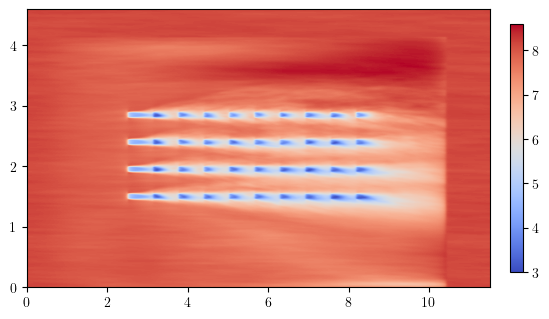

In [4]:
plt.imshow(ux.T, extent=[0, 11.52, 0, 4.6], origin='lower', cmap='coolwarm',
           interpolation='gaussian', aspect='1.5')
plt.colorbar(fraction=0.025, pad=0.04)
plt.savefig('Plots/ux.pdf', bbox_inches='tight')

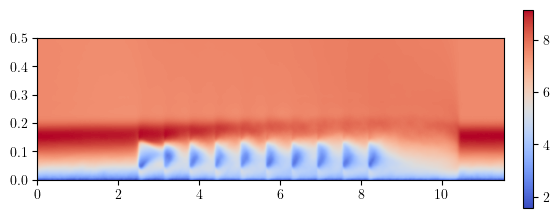

In [5]:
plt.imshow(ux1.T, extent=[0, 11.52, 0, 0.5], origin='lower', cmap='coolwarm',
           interpolation='gaussian', aspect='7')
plt.colorbar(fraction=0.02, pad=0.04)
plt.savefig('Plots/ux1.pdf', bbox_inches='tight')

### Calculating power production by each turbine

In [6]:
dx = 9
dy = 9
dz = 5

nx = int(7*90/dx)
ny = int(5*90/dy)
nz = int(2*90/dz)

power = np.zeros((10,4))

for j in range(0,4):
    for i in range(0,10):
        temp, temp1 = 0, 0
        start_index = (round(2500/9) - round(3.5*90/9) + i*round(7*90/9), round(1500/9) - round(2.5*90/9) + j*round(5*90/9),0)
        
        temp = (dz/2)*(fu[:,:,0] + 2 * np.sum(fu[:,:,1:nz-1],axis=2) + fu[:,:,nz-1]) + (dz/2)*(fv[:,:,0] + 2 * np.sum(fv[:,:,1:nz-1],axis=2) + fv[:,:,nz-1])
        temp1 = (dy/2)*(temp[:,start_index[1]] + 2 * np.sum(temp[:,start_index[1]+1:start_index[1]+ny-1],axis=1) + temp[:,start_index[1]+ny-1])
        power[i,j] = (dx/2)*(temp1[start_index[0]] + 2 * np.sum(temp1[start_index[0]+1:start_index[0]+nx-1],axis=0) + temp1[start_index[0]+nx-1])

normalised_power = power.sum(axis=1)/power[0].sum()

### Plotting normalised power vs rows

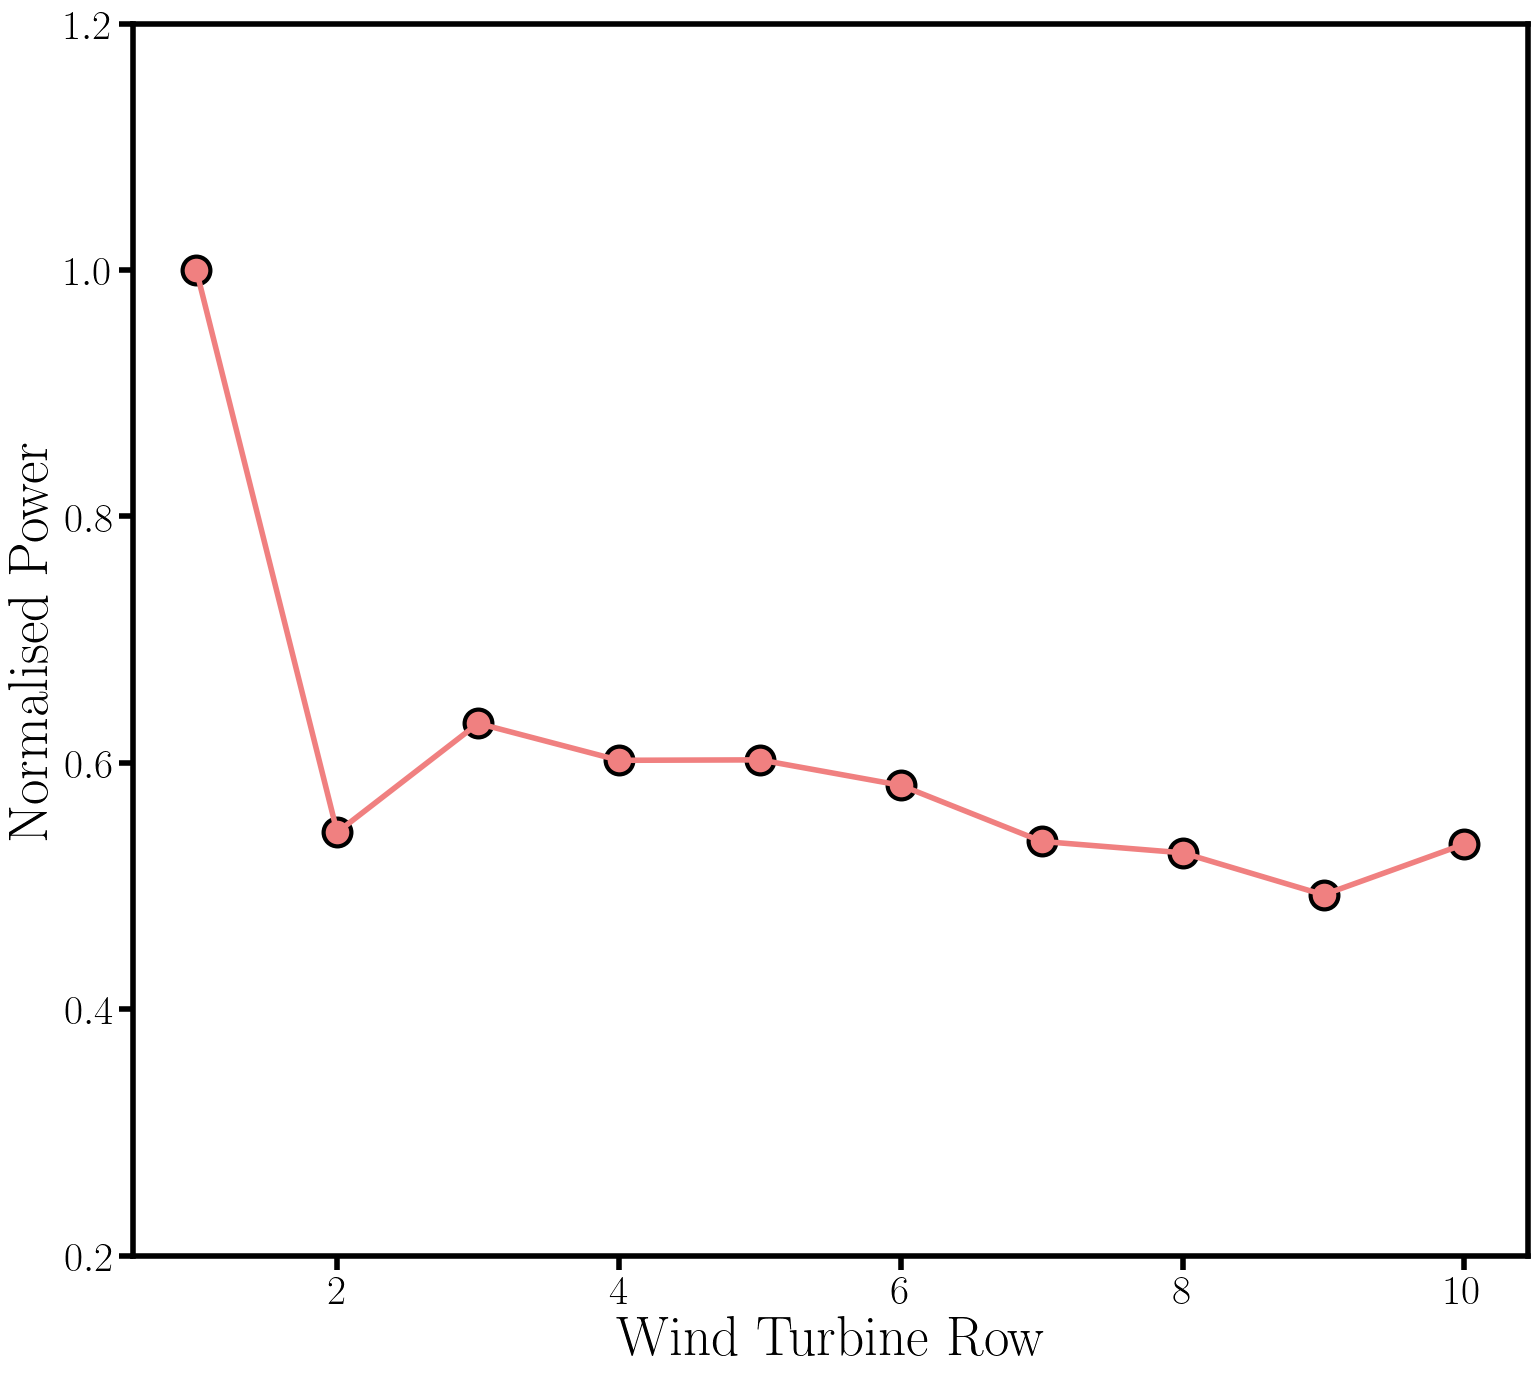

In [7]:
AxesLabel1, TickLabel1 = [30, 30]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': 40,                       # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})

fig, ax = plt.subplots(1, figsize=(18, 16))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)
    
ax.tick_params(width=4)
ax.tick_params(axis='both', which='major', length=10)

ax.plot(np.linspace(1,10,10), normalised_power, 'lightcoral', linewidth=4)
plt.scatter(np.linspace(1,10,10), normalised_power, s=400, c = 'lightcoral', edgecolors='k', linewidth=3)

ax.set_xlabel('Wind Turbine Row')
ax.set_ylabel('Normalised Power')
ax.set_ylim([0.2,1.2])

plt.savefig('Plots/fig_3f.pdf', bbox_inches='tight')

### Calculating turbulence production in each turbine

In [9]:
dx = 9
dy = 9
dz = 5

nx = int(7*90/dx)
ny = int(5*90/dy)
nz = int(2*90/dz)

production = np.zeros((10,4))

for j in range(0,4):
    for i in range(0,10):
        temp, temp1 = 0, 0
        start_index = (round(2500/9) - round(3.5*90/9) + i*round(7*90/9), round(1500/9) - round(2.5*90/9) + j*round(5*90/9),0)
        
        temp = (dz/2)*(prod[:,:,0] + 2 * np.sum(prod[:,:,1:nz-1],axis=2) + prod[:,:,nz-1])
        temp1 = (dy/2)*(temp[:,start_index[1]] + 2 * np.sum(temp[:,start_index[1]+1:start_index[1]+ny-1],axis=1) + temp[:,start_index[1]+ny-1])
        production[i,j] = (dx/2)*(temp1[start_index[0]] + 2 * np.sum(temp1[start_index[0]+1:start_index[0]+nx-1],axis=0) + temp1[start_index[0]+nx-1])

normalised_production = production.sum(axis=1)/power[0].sum()

### Calculating dissipation in each turbine

In [10]:
dx = 9
dy = 9
dz = 5

nx = int(7*90/dx)
ny = int(5*90/dy)
nz = int(2*90/dz)

diss = txxs11 + tyys22 + tzzs33 + 2 * (txys12 + txzs13 + tyzs23) 

dissipation = np.zeros((10,4))

for j in range(0,4):
    for i in range(0,10):
        temp, temp1 = 0, 0
        start_index = (round(2500/9) - round(3.5*90/9) + i*round(7*90/9), round(1500/9) - round(2.5*90/9) + j*round(5*90/9),0)
        
        temp = (dz/2)*(diss[:,:,0] + 2 * np.sum(diss[:,:,1:nz-1],axis=2) + diss[:,:,nz-1])
        temp1 = (dy/2)*(temp[:,start_index[1]] + 2 * np.sum(temp[:,start_index[1]+1:start_index[1]+ny-1],axis=1) + temp[:,start_index[1]+ny-1])
        dissipation[i,j] = (dx/2)*(temp1[start_index[0]] + 2 * np.sum(temp1[start_index[0]+1:start_index[0]+nx-1],axis=0) + temp1[start_index[0]+nx-1])

normalised_dissipation = dissipation.sum(axis=1)/power[0].sum()

### Plotting power, production, dissipation vs rows

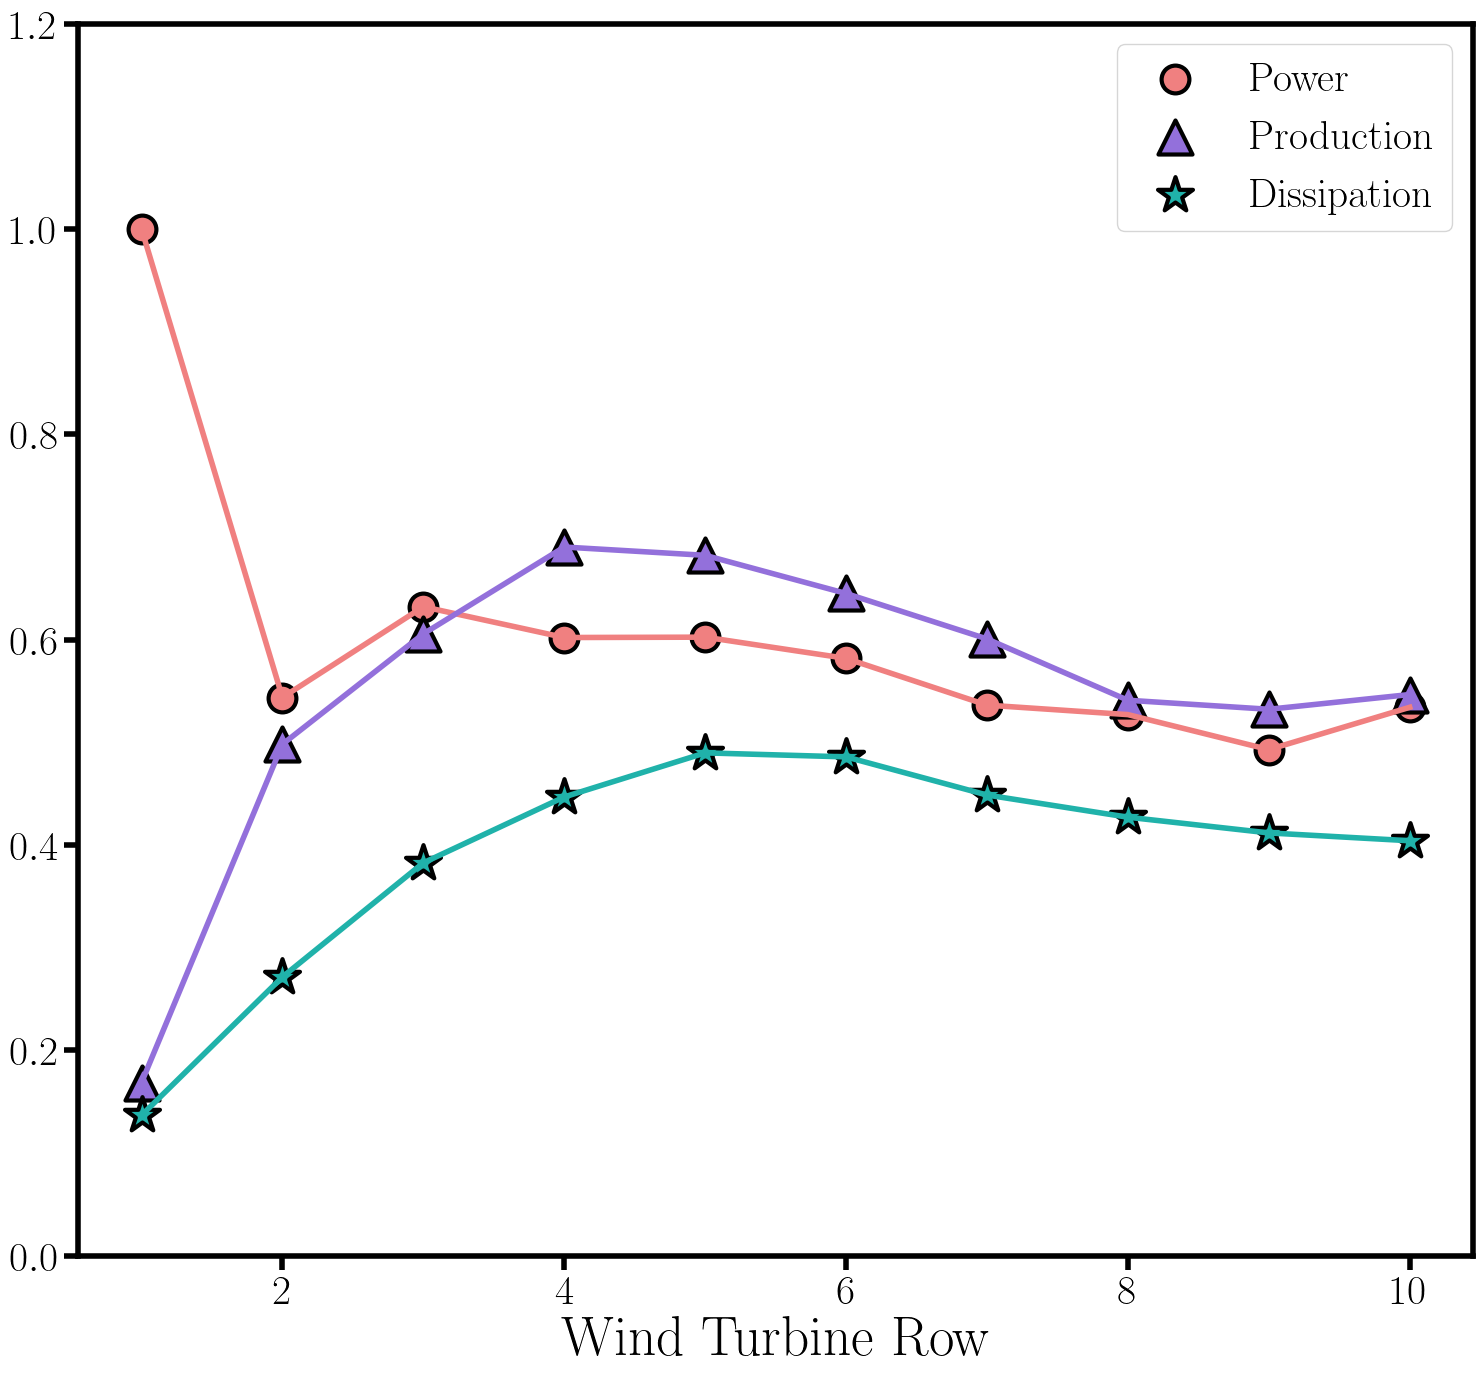

In [11]:
AxesLabel1, TickLabel1 = [30, 30]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': 40,                       # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})

fig, ax = plt.subplots(1, figsize=(18, 16))

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(4)
    
ax.tick_params(width=4)
ax.tick_params(axis='both', which='major', length=10)

ax.plot(np.linspace(1,10,10), normalised_power, 'lightcoral', linewidth=4)
plt.scatter(np.linspace(1,10,10), normalised_power, s=400, c = 'lightcoral',label = 'Power', edgecolors='k', linewidth=3)

ax.plot(np.linspace(1,10,10), normalised_production, 'mediumpurple', linewidth=4)
plt.scatter(np.linspace(1,10,10), normalised_production, s=600, c = 'mediumpurple', marker='^', label = 'Production', edgecolors='k', linewidth=3)

ax.plot(np.linspace(1,10,10), normalised_dissipation, 'lightseagreen', linewidth=4)
plt.scatter(np.linspace(1,10,10), normalised_dissipation, s=700, c = 'lightseagreen', marker='*', label = 'Dissipation', edgecolors='k', linewidth=3)

ax.set_xlabel('Wind Turbine Row')
ax.set_ylim([0.0,1.2])

ax.legend(loc='upper right', fontsize=30)

plt.savefig('Plots/fig_1g.pdf', bbox_inches='tight')